# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [12]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('/GA-SEA-DAT2/data/yelp.csv')
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [1]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary named "data" using using json.loads()
import json
import pandas as pd
with open('../data/yelp.json', 'rU') as f:
    data = [json.loads(row) for row in f]

In [2]:
# show the first review
data[0]

{u'business_id': u'9yKzy9PApeiPPOUJEtnvkg',
 u'date': u'2011-01-26',
 u'review_id': u'fWKvX83p0-ka4JS3dc6E5A',
 u'stars': 5,
 u'text': u'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\

In [3]:
# convert the list of dictionaries to a DataFrame
df = pd.DataFrame.from_dict(data, orient='columns')

print(df)

                 business_id        date               review_id  stars  \
0     9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1     ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2     6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3     _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4     6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   
5     -yxfBYGB6SEqszmxJxd97A  2007-12-13  m2CKSsepBCoRYWxiRUsxAg      4   
6     zp713qNhx8d9KCJJnrw1xA  2010-02-12  riFQ3vxNpP4rWLk_CSri2A      5   
7     hW0Ne_HTHEAgGF1rAdmR-g  2012-07-12  JL7GXJ9u4YMx7Rzs05NfiQ      4   
8     wNUea3IXZWD63bbOQaOH-g  2012-08-17  XtnfnYmnJYi71yIuGsXIUA      4   
9     nMHhuYan8e3cONo3PornJA  2010-08-11  jJAIXA46pU1swYyRCdfXtQ      5   
10    AsSCv0q_BWqIe3mX2JqsOQ  2010-06-16  E11jzpKz9Kw5K7fuARWfRw      5   
11    e9nN4XxjdHj4qtKCOPq_vg  2011-10-21  3rPt0LxF7rgmEUrznoH22w      5   
12    h53YuCiIDfEFSJCQpk8

In [4]:
# add DataFrame columns for cool, useful, and funny

df['cool'] = [row['votes']['cool'] for row in data]
df['useful'] = [row['votes']['useful'] for row in data]
df['funny'] = [row['votes']['funny'] for row in data]


In [5]:
# drop the votes column and then display the head

df.drop('votes', axis=1, inplace=True)

## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [6]:
# treat stars as a categorical variable and look for differences between groups by comparing the means of the groups
df.groupby('stars').mean()

,cool,useful,funny
stars,,,
1,0.576769,1.604806,1.056075
2,0.719525,1.563107,0.875944
3,0.788501,1.306639,0.694730
4,0.954623,1.395916,0.670448
5,0.944261,1.381780,0.608631


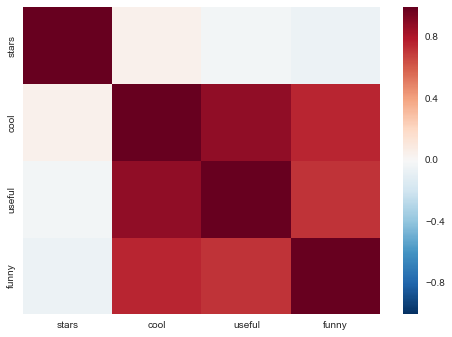

In [7]:
# display acorrelation matrix of the vote types (cool/useful/funny) and stars
%matplotlib inline
import seaborn as sns
sns.heatmap(df.corr())

(-1, 10)

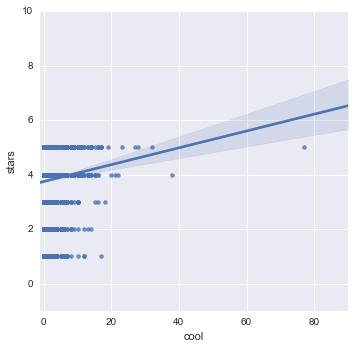

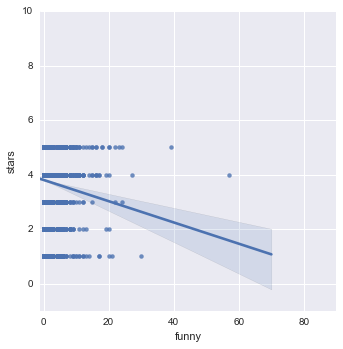

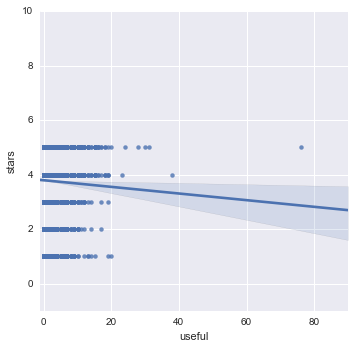

In [8]:
# display multiple scatter plots (cool, useful, funny) with linear regression line
sns.lmplot(x='cool', y='stars', data=df, ci=95, fit_reg=True)
sns.plt.xlim(-1, 90)
sns.plt.ylim(-1, 10)



sns.lmplot(x='funny', y='stars', data=df, ci=95, fit_reg=True)
sns.plt.xlim(-1, 90)
sns.plt.ylim(-1, 10)


sns.lmplot(x='useful', y='stars', data=df, ci=95, fit_reg=True)
sns.plt.xlim(-1, 90)
sns.plt.ylim(-1, 10)

## Task 3

Define cool/useful/funny as the feature matrix X, and stars as the response vector y.

In [9]:
#feature matrix
feature_cols = ['cool', 'useful', 'funny']
X = df[feature_cols]

#response vector 
response_vector = ['stars']
y = df[response_vector]

## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

print reg.intercept_
print reg.coef_

[ 3.83989479]
[[ 0.27435947 -0.14745239 -0.13567449]]


## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [11]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

In [12]:
# define a function that accepts a list of features and returns testing RMSE
def rmse_train_test(feature_cols):
    X = df[feature_cols]
    yy = df[response_vector]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=777)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [17]:
# calculate RMSE with all three features
#rmse_train_test(feature_cols)

#alt 
rmse_train_test(['cool', 'useful', 'funny'])

1.1979297318530078

## Task 6

Try removing some of the features and see if the RMSE improves.

In [22]:
print("RMSE for funny feature:")
print(rmse_train_test(['funny']))


print("RMSE for cool feature:")
print(rmse_train_test(['cool']))


print("RMSE for useful feature:")
print(rmse_train_test(['useful']))


#cool and useful seem to be the features that work best
print("RMSE for cool and useful feature:")
print(rmse_train_test(['cool', 'useful']))


print("RMSE for cool and funny feature:")
print(rmse_train_test(['cool', 'funny']))


print("RMSE for funny and useful feature:")
print(rmse_train_test(['funny', 'useful']))


print("RMSE for all feature:")
print(rmse_train_test(['cool', 'useful', 'funny']))

RMSE for funny feature:
1.20619614865
RMSE for cool feature:
1.20616834353
RMSE for useful feature:
1.21090710448
RMSE for cool and useful feature:
1.19740928009
RMSE for cool and funny feature:
1.20877292668
RMSE for funny and useful feature:
1.20487286473
RMSE for all feature:
1.19792973185


## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [24]:
# new feature: 

df['sum_votes'] = df['cool'] + df['useful'] + df['funny']

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,sum_votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,7
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,1
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,3
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1,8
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,18
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0,1
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0,1


In [25]:
# new features: 
feature_cols = ['cool', 'useful', 'funny', 'sum_votes']
X = df[feature_cols]

In [26]:
# add new features to the model and calculate RMSE
print("RMSE for total votes:")
print(rmse_train_test(['sum_votes']))

RMSE for total votes:
1.20959949464


## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [61]:
#test train split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=777)


# NUMPY array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)


# fill the array with the mean value of y_test
y_null = pd.DataFrame(y_null)
#print(y_test.mean())
y_null.fillna(3.7732)

# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

3.9621711219986451